# Unsupervised learning(Clustering)

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

## Unsupervised learning(비지도학습)
> `Unsupervised learning`(비지도 학습) 모델은 종속변수 유무에 따라 구분한 머신러닝 알고리즘이다.  
분류하고자 하는 **종속변수(traget)가 존재하지 않거나** 준지도학습을 위한 종속변수 생성을 목적으로 사용한다.  
비지도 학습으로 **분류문제를 해결**한다.  
거리 기반(유사도) 계산을 통해 **유사한 샘플을 묶어 같은 class(군집)으로 만드는 것을 목적**으로 한다.  
즉, 같은 군집 내 샘플 간 거리는 가깝게, 다른 군집에 있는 샘플 간 거리는 멀게 묶는 것이 목적.  
종속변수가 존재하지 않기에 **객관적인 평가가 어렵다.**

>> - Top-down clustering : **`K-Means`** k-평균 클러스터링  
- Bottom-up clustering : **`AgglomerativeClustering`** 계층적 군집화  
- 밀도기반 군집화 : **`DBSCAN`** density based spatial clustering of application with noise

### 벡터 간 거리
$$x = (x_1, x_2, x_3, ... x_N)$$
$$y = (y_1, y_2, y_3, ... y_N)$$  

위의 두 벡터 $x$와 $y$간 거리는 다음과 같이 계산한다.
> 맨하탄 거리(Manhattan distance)  
$$ \sum_{i=1}^N \left\vert x_i - y_i \right\vert $$

> 유클리디안 거리(Euclidean distance)  
$$ \sum_{i=1}^N (x_i - y_i)^2 $$

> 코사인 유사도(cosine similarity)  
$$ x_i \cdot y_i \over \left\vert\left\vert x_i \right\vert\right\vert \left\vert\left\vert x_j \right\vert\right\vert$$

## Kmeans clustering
> 1. K개의 군집(cluster) 중심(centroid)을 임의로 초기화 한 후 각 중심과 가장 가까운 점들을 찾음.  
2. 중심과 가까운 점들의 평균지점(무게중심)을 계산하여 각 군집의 새로운 중심으로 사용.  
(즉, 중심과 각 군집에 속한 샘플간의 거리를 최소화 시키는 방법으로 학습)  
3. 중심이 변하지 않을 때까지 이 과정을 반복함.  

![kmean2](https://drive.google.com/uc?id=1ApR1PfrJInHfZYTfCm7wr5ZNx7UN0CxW)
![kmean1](https://drive.google.com/uc?id=1etEyG_qgRVtFfsb8dlXtBxA_xHp2R2eB)

실제로는 다차원 공간상에 있는 샘플을 하나의 점으로 인식하여 거리계산을 하고 분류합니다.

### Kmeans clustering 실습

In [6]:
# 아이리스 데이터 로드
iris = load_iris()

In [7]:
# 타겟 데이터 분리
X = iris.data
y = iris.target

In [9]:
from sklearn.cluster import KMeans

In [1]:
# 모델 생성
KM = KMeans(n_clusters=3, max_iter=100)
'''
n_clusters=10 : 몇개의 클러스터로 구분 할 것인지
max_iter=300 : centroid 업데이트 횟수. 데이터가 크면 클 수록 늘어나야 함.
파라메터와 별개로 중심점과 샘플간의 거리 척도는 유클리디언 거리를 사용하며 거리척도는 변경 불가능하다.
'''

'\nn_clusters=10 : 몇개의 클러스터로 구분 할 것인지\nmax_iter=300 : centroid 업데이트 횟수. 데이터가 크면 클 수록 늘어나야 함.\n파라메터와 별개로 중심점과 샘플간의 거리 척도는 유클리디언 거리를 사용하며 거리척도는 변경 불가능하다.\n'

In [8]:
# 모델 학습
KM.fit(X)

KMeans(max_iter=100, n_clusters=3)

In [32]:
# 모델이 임의로 부여한 클래스에 어떠한 의미도 없으며 순서가 무작위
# 이런 이유로 임의평가가 조금 복잡한 과정을 지님.
# 학습 결과 확인
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Agglomerative clustering( Hierarchy clustering)
계층적군집화라고도 부름. 데이터 포인트를 하나의 클러스터로 지정해 지정 된 클러스터 갯수가 될 때까지 두 클러스터를 합쳐나간다.

![aggc](https://drive.google.com/uc?id=1VYQW6g15jBYF2568ylw3aTNR96TFVHj6)

### 클러스터 결합 방법
![linkage](https://drive.google.com/uc?id=13TUPNXHrSEI4We7jKA0FY3kp9Dv1EgA-)

In [44]:
# 모델 import 
from sklearn.cluster import AgglomerativeClustering

In [48]:
# 모델 생성
agg = AgglomerativeClustering(n_clusters=3)
'''
n_clusters=2 : 몇 개의 클러스터 구분인지
affinity='euclidean' : 거리척도 (euclidean, manhattan, cosine)
linkage='ward' : 군집 간 거리 계산 방법 ('ward':중심, 'single':최단거리, 'complete':최장거리, 'average': 평균)
'''

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
# 새로운 데이터에 적용 안됨. 기존 데이터를 바탕으로 fit_predict() 사용
agg.fit_predict(X)

### dendrogram(덴드로그램)
> 2차원 이상의 계층적 군집화 모델을 표현하기 위한 도구  
같은 가지에 속한 샘플은 같은 클러스터  
linkage 방법에 따라 클러스터가 합쳐지며 가지의 길이는 클러스터 간 거리이다. 

![dendrogram](https://drive.google.com/uc?id=131YosmMYIqRj1mvGjTuJjpdSx8u3oZbZ)

In [53]:
# 함수 import 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

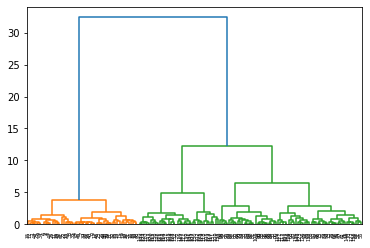

In [54]:
# 덴드로그램 plotting
Z = linkage(X, method = 'ward', metric = 'euclidean') # 거리 계산 
D = dendrogram(Z) # 덴드로그램 그리기
plt.show() # 덴드로그램 출력

## DBSCAN(density based spatial clustering of application with noise)
> 앞서 소개한 계층적 군집화나 K-means 군집화 알고리즘은 샘플간 혹은 군집간 거리를 기준으로 학습한다.  
반면 `DBSCAN`은 **샘플의 밀도가 높은 부분을 하나의 군집**으로 인식한다.  
특정 샘플 기준으로 설정한 반경($\epsilon$ : 입실론) 내 n개 이상의 샘플이 있으면 이를 하나의 군집으로 인식한다.  
밀도 기반 군집화에서는 군집에 속하지 않는 샘플이 발생하기도 하며, 이는 이상치라고 판단한다.  

<img src="https://drive.google.com/uc?id=1htsHkWutMidznsMM_lNPGEH7SOYJvJsU" height="500px" width="500px">  

이 다이어그램에서 minPts = 4. 점 A와 다른 빨간색 점들은 core point.  
θ 반지름에서 이러한 점들을 둘러싼 영역에는 최소 4개의 점(점 자체 포함)이 포함되고, 서로 연결할 수 있기 때문에 단일 클러스터를 형성합니다.  
점 B와 C는 core point가 아니지만 A에서(다른 core point를 통해) 도달할 수 있으므로 군집에 포함. (border point : 보통 군집화 경계)  
점 N은 핵심점이 아니거나 직접 도달할 수 없는 noise point.


### DBSCAN 특징
![DBSCAN1](https://drive.google.com/uc?id=14rFtn4MhcKGRCUeRs1M0zbMx2zEC-gid)

위와 같은 작동 방식으로 인하여 `DBSCAN`에서는 클러스터 숫자를 특정 할 필요가 없으며 복잡한 분포의 데이터에도 적용이 가능하다.  

![kmean_vs_dbscan](https://drive.google.com/uc?id=17NKVQag8H2ZG-SZg24UE2XUkEBcarzDU)
![dbscan_smile](https://drive.google.com/uc?id=12mR7xQlWctZVACUsLcqTr1IKvwUv6-fv)

### DBSCAN 실습

In [ ]:
# 모델 import 
from sklearn.cluster import DBSCAN

In [56]:
# 모델 생성
dbscan = DBSCAN()
'''
eps=0.5 : 입실론(중심반경)
min_samples=5, 중심기준 추적 샘플 수
metric='euclidean', 거리 측정 방법
eps와 min_samples가 가장 중요하지만 최적 파라메터 측정이 어렵다. 디폴트 값이 가장 잘 맞는 편.
'''

"\neps=0.5 : 입실론(중심반경)\nmin_samples=5, 중심기준 추적 샘플 수\nmetric='euclidean', 거리 측정 방법\neps와 min_samples가 가장 중요하지만 최적 파라메터 측정이 어렵다. 디폴트 값이 가장 잘 맞는 편.\n"

In [68]:
# 데이터셋 제작 및 전처리 함수 import
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [69]:
# 특이패턴 데이터 생성 및 전처리
X_moon, y_moon = make_moons(n_samples=200, noise=0.05)
scaler = StandardScaler() # 평균을 0, 표준편차를 1로
X_moon_scaled = scaler.fit_transform(X_moon) # 작업과 함께 원본값에 적용

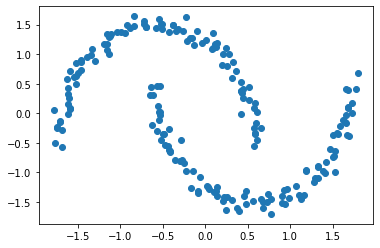

In [70]:
# data plotting
plt.scatter(X_moon_scaled[:,0], X_moon_scaled[:,1])

In [73]:
# 모델 학습 및 예측
prediction = dbscan.fit_predict(X_moon_scaled)

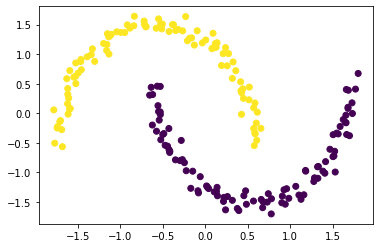

In [74]:
# 결과값 출력
plt.scatter(X_moon_scaled[:,0], X_moon_scaled[:,1], c=prediction)